In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import adam_v2
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


2022-04-17 17:03:22.490910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 17:03:22.491000: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data=pd.read_csv('input/1429_1.csv')
data.head()

/tmp/ipykernel_10531/4271306387.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('input/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
# yelp['label'] = ['1' if star > 3 else '0' for star in yelp['stars']];

In [3]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="pink")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating")
sns.despine(left=True, bottom=True)
plt.show()

In [4]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [5]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


/tmp/ipykernel_10531/2563451476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpermanent['reviews.rating'] = mpermanent['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)
/home/somyamehta_24/sentimentAnalysis/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(64624, 4)

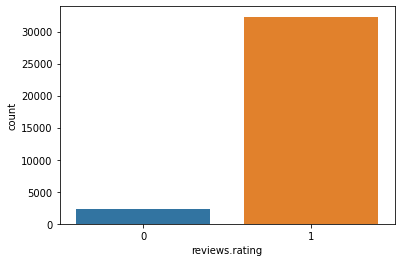

In [6]:
import seaborn as sns
from sklearn.utils import resample

mpermanent['reviews.rating'] = mpermanent['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)


sns.countplot(mpermanent['reviews.rating'])
#create two different dataframe of majority and minority class
df_majority = mpermanent[(mpermanent['reviews.rating'] == 1)]
df_minority = mpermanent[(mpermanent['reviews.rating'] == 0)]
df_minority_upsampled = resample(
    df_minority,
    replace=True,  # sample with replacement
    n_samples=32315,  # to match majority class
    random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
actualrating = df_upsampled
actualrating.shape


In [7]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
# X =x[xindex(False)]

In [8]:
len(y)
# len(X)

64624

In [9]:
X = x['reviews.text']
print(X)

0        The tablet is nice but the internet source tak...
1        I was not a fan of the Amazon type operating s...
2        My kids like down games and play with. It is f...
3        This is a competent tablet at a bargain price....
4        This tablet conked out on me the first day I p...
                               ...                        
64619    I have only used it one time to download an e-...
64620    Excellent charging quality with heavy duty cor...
64621    This charger (9W) rapid charger is as describe...
64622    just what i expected and just what I wanted. t...
64623                                     Connects snugly!
Name: reviews.text, Length: 64624, dtype: object


In [10]:
print(len(X))

64624


In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# import nltk
nltk.download('punkt')
stemmer = PorterStemmer()


# lemmatize string
def stemmerize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [stemmer.stem(word) for word in word_tokens]
    return lemmas


import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostop=' '.join(nostop)
    return stemmerize_word(nostop)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/somyamehta_24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
tokens = X[0].split()
print(tokens)

['The', 'tablet', 'is', 'nice', 'but', 'the', 'internet', 'source', 'takes', 'forever', 'to', 'load', 'so', 'it', 'is', 'just', 'easier', 'to', 'use', 'a', 'standard', 'computer', 'or', 'phone', 'to', 'surf', 'the', 'web', 'or', 'get', 'on', 'Facebook,', 'etc.']


In [22]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['hey', 'sampl', 'review', 'happen', 'contain', 'punctuat']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

KeyboardInterrupt: 

In [20]:
len(bow_transformer.vocabulary_)

16954

In [21]:
review_24 = X[24]

In [22]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x16954 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [23]:
print(bow_25)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [24]:
X = bow_transformer.transform(X)

In [25]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Naive Bayes Classifier**

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
preds = nb.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.20      0.11      0.14       117
         5.0       0.99      0.99      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.59      0.55      0.57      7254
weighted avg       0.97      0.98      0.98      7254



0.9839872370597967

In [ ]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

In [ ]:
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

In [ ]:
nb = MultinomialNB(alpha=0.4)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

**support vector machine**

In [29]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.9908414086504372

In [ ]:
for i in range(3,8):
	clf = SVC(kernel="poly",degree=i)
	clf.fit(X_train, y_train)
	predsvmp = clf.predict(X_test)
	print('\n')
	print(confusion_matrix(y_test, predsvmp))
	print(classification_report(y_test, predsvmp))
	predsvmp = clf.predict(X_test)
	clf.score(X_train, y_train)


In [ ]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train, y_train)
predsvms = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvms))
predsvms = clf.predict(X_test)
clf.score(X_train, y_train)